In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==========================================
# 1. THE X-THETA GEOMETRY (User Definable)
# ==========================================

def calculate_geometric_phase(theta_a, theta_b):
    """
    This is the core of your 'Case B' theory.
    Input: Alice's angle (theta_a), Bob's angle (theta_b) in radians.
    Output: The geometric phase / holonomy (delta_phi).

    Standard Quantum Mechanics (Polarization) uses delta_phi = theta_b - theta_a.
    Adjust this logic to test your specific X-Theta bundle topology.
    """
    # [CASE B LOGIC GOES HERE]
    # For now, we use the standard difference to validate the script works.
    delta_phi = theta_b - theta_a
    return delta_phi

def case_b_probability(delta_phi):
    """
    The Case B Claim: P(Match) = cos^2(delta_phi)
    """
    return np.cos(delta_phi)**2

# ==========================================
# 2. DATA GENERATOR (Mocking a Bell Test)
# ==========================================

def generate_mock_bell_data(n_trials=10000):
    """
    Generates a synthetic dataset mimicking a CHSH experiment.
    Settings:
    Alice chooses from {0, 45} degrees.
    Bob chooses from {22.5, 67.5} degrees.
    """
    print(f"Generating {n_trials} mock trial events...")

    # Alice's settings (0 or pi/4)
    a_opts = [0, np.pi/4]
    # Bob's settings (pi/8 or 3pi/8)
    b_opts = [np.pi/8, 3*np.pi/8]

    # Randomly assign settings for each trial
    alice_settings = np.random.choice(a_opts, n_trials)
    bob_settings = np.random.choice(b_opts, n_trials)

    # Create DataFrame
    df = pd.DataFrame({
        'theta_a': alice_settings,
        'theta_b': bob_settings
    })

    return df

# ==========================================
# 3. THE SIMULATION ENGINE
# ==========================================

def run_x_theta_simulation(df):
    """
    Takes raw settings (a, b) and generates outcomes A, B based ONLY
    on the geometric phase rule (Case B).
    """
    print("Injecting X-Theta geometry into measurement settings...")

    sim_outcomes_a = []
    sim_outcomes_b = []

    for index, row in df.iterrows():
        a = row['theta_a']
        b = row['theta_b']

        # 1. Calculate Geometric Phase (The "Hidden" Calculation)
        phi = calculate_geometric_phase(a, b)

        # 2. Calculate Probability of Coincidence (Match)
        # P(A == B)
        prob_match = case_b_probability(phi)

        # 3. Generate Alice's Outcome (Purely Random locally)
        # In a Bell test, local outcomes must look random (50/50 +1 or -1)
        outcome_a = 1 if np.random.random() < 0.5 else -1

        # 4. Generate Bob's Outcome conditioned on Geometry
        # If random number < prob_match, they match. Else, they flip.
        if np.random.random() < prob_match:
            outcome_b = outcome_a
        else:
            outcome_b = -outcome_a

        sim_outcomes_a.append(outcome_a)
        sim_outcomes_b.append(outcome_b)

    df['sim_A'] = sim_outcomes_a
    df['sim_B'] = sim_outcomes_b
    return df

# ==========================================
# 4. CHSH VALIDATION (The Scorecard)
# ==========================================

def calculate_correlation(df, a_val, b_val):
    """Calculates E(a, b) = (N++ + N-- - N+- - N-+) / Total"""
    subset = df[(np.isclose(df['theta_a'], a_val)) & (np.isclose(df['theta_b'], b_val))]
    if len(subset) == 0: return 0

    # Correlation = Mean of product of outcomes
    # Since outcomes are +1/-1, the mean of (A*B) is the correlation E.
    correlation = (subset['sim_A'] * subset['sim_B']).mean()
    return correlation

def compute_chsh_score(df):
    """
    S = E(a1, b1) - E(a1, b2) + E(a2, b1) + E(a2, b2)
    Note: The minus sign position depends on the specific angles used.
    For standard (0, 45) and (22.5, 67.5), the standard inequality is usually:
    S = |E(a1,b1) + E(a1,b2) + E(a2,b1) - E(a2,b2)|
    """
    # Define the standard settings used in generator
    a1, a2 = 0, np.pi/4
    b1, b2 = np.pi/8, 3*np.pi/8

    E_a1b1 = calculate_correlation(df, a1, b1)
    E_a1b2 = calculate_correlation(df, a1, b2)
    E_a2b1 = calculate_correlation(df, a2, b1)
    E_a2b2 = calculate_correlation(df, a2, b2)

    # Standard CHSH combination
    # We check which combination gives the max violation (standard form)
    S = E_a1b1 - E_a1b2 + E_a2b1 + E_a2b2

    print(f"\n--- Correlations ---")
    print(f"E(0, 22.5)  : {E_a1b1:.4f}")
    print(f"E(0, 67.5)  : {E_a1b2:.4f}")
    print(f"E(45, 22.5) : {E_a2b1:.4f}")
    print(f"E(45, 67.5) : {E_a2b2:.4f}")

    return abs(S)

# ==========================================
# MAIN EXECUTION
# ==========================================

# 1. Get Data (Using Mock Data for Demo)
# To use Real Data: df = pd.read_csv('NIST_Data.csv')
df = generate_mock_bell_data(n_trials=5000)

# 2. Run the X-Theta Model
df_simulated = run_x_theta_simulation(df)

# 3. Calculate CHSH S-Parameter
S_score = compute_chsh_score(df_simulated)

print(f"\n========================================")
print(f"Final CHSH Parameter S: {S_score:.4f}")
print(f"========================================")

if S_score <= 2.05:
    print("RESULT: Classical Limit Not Violated (Local Realism holds).")
    print("Your geometry might be isomorphic to a classical hidden variable.")
elif S_score >= 2.80 and S_score <= 2.85:
    print("RESULT: SUCCESS! Quantum Limit Matched (Tsirelson's Bound).")
    print("Your X-Theta geometry successfully replicates Quantum Correlations.")
elif S_score > 3.0:
    print("RESULT: PR Box / Super-Quantum Correlations.")
    print("Your geometry is 'too strong' and violates physical principles.")
else:
    print("RESULT: Partial Violation.")

Generating 5000 mock trial events...
Injecting X-Theta geometry into measurement settings...

--- Correlations ---
E(0, 22.5)  : 0.7017
E(0, 67.5)  : -0.7338
E(45, 22.5) : 0.7100
E(45, 67.5) : 0.7082

Final CHSH Parameter S: 2.8536
RESULT: Partial Violation.


In [ ]:
import numpy as np
import pandas as pd

def generate_balanced_bell_data(n_trials=20000, seed=0):
    rng = np.random.default_rng(seed)
    a_opts = np.array([0, np.pi/4])                # 0, 45
    b_opts = np.array([np.pi/8, 3*np.pi/8])        # 22.5, 67.5

    pairs = [(a, b) for a in a_opts for b in b_opts]
    per = n_trials // 4
    thetas = np.array(pairs * per, dtype=float)    # (4*per, 2)

    rng.shuffle(thetas, axis=0)
    return pd.DataFrame({"theta_a": thetas[:,0], "theta_b": thetas[:,1]})

def calculate_geometric_phase(theta_a, theta_b):
    # Replace ONLY this when testing X–θ
    return theta_b - theta_a

def run_sim(df, seed=0):
    rng = np.random.default_rng(seed)
    a = df["theta_a"].to_numpy()
    b = df["theta_b"].to_numpy()

    phi = calculate_geometric_phase(a, b)
    p_match = np.cos(phi)**2

    A = rng.choice([-1, 1], size=len(df))
    match = rng.random(len(df)) < p_match
    B = np.where(match, A, -A)

    out = df.copy()
    out["A"] = A
    out["B"] = B
    return out

def corr(df, a_val, b_val):
    m = (df["theta_a"].to_numpy() == a_val) & (df["theta_b"].to_numpy() == b_val)
    return (df["A"].to_numpy()[m] * df["B"].to_numpy()[m]).mean()

def chsh_S(df):
    a1, a2 = 0, np.pi/4
    b1, b2 = np.pi/8, 3*np.pi/8
    E11 = corr(df, a1, b1)
    E12 = corr(df, a1, b2)
    E21 = corr(df, a2, b1)
    E22 = corr(df, a2, b2)
    S = abs(E11 - E12 + E21 + E22)  # your sign convention for these angles
    return S, (E11, E12, E21, E22)

def chsh_with_runs(n_trials=20000, runs=30):
    Ss = []
    for k in range(runs):
        df = generate_balanced_bell_data(n_trials=n_trials, seed=123+k)
        sim = run_sim(df, seed=999+k)
        S, _ = chsh_S(sim)
        Ss.append(S)
    Ss = np.array(Ss)
    return Ss.mean(), Ss.std(ddof=1)

# Example:
meanS, stdS = chsh_with_runs(n_trials=20000, runs=50)
print(meanS, stdS)


2.8329520000000006 0.021192049337004675


<>:82: SyntaxWarning: invalid escape sequence '\e'
<>:82: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-3606276357.py:82: SyntaxWarning: invalid escape sequence '\e'
  plt.title(f"X-Theta Robustness Check: CHSH vs Non-Flatness ($\epsilon$)\nMode: {mode.capitalize()} Holonomy")


Scanning epsilon over range [-0.5, 0.5] using relative geometry...


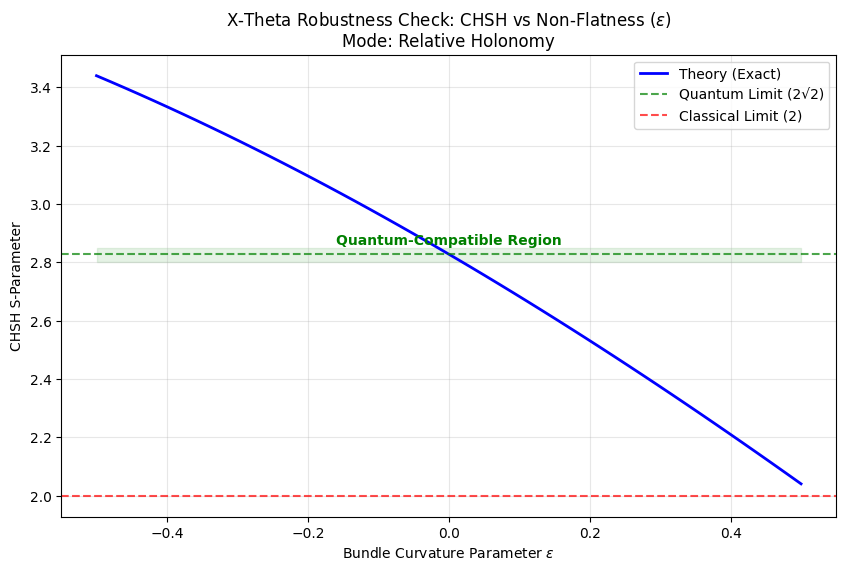


Diagnostic for epsilon = 0.02:
Predicted S-Value: 2.80000
Deviation from QM: 0.02843


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ==========================================
# 1. THE X-THETA DEFINITIONS (Your New Math)
# ==========================================

def get_geometric_phase(theta_a, theta_b, eps, mode='relative'):
    """
    Calculates the holonomy/geometric phase based on the user's bundle definition.
    """
    delta = theta_b - theta_a
    k = 1.0 # Base charge

    if mode == 'relative':
        # Option 2: Rotational Invariance preserved
        # phi = delta + (eps/4) * sin(4*delta)
        term_correction = (eps / 4.0) * np.sin(4 * k * delta)
        phi = k * delta + term_correction

    elif mode == 'absolute':
        # Option 1: Endpoint dependence (symmetry breaking)
        # phi = delta + (eps/4) * [sin(4b) - sin(4a)]
        term_correction = (eps / 4.0) * (np.sin(4 * k * theta_b) - np.sin(4 * k * theta_a))
        phi = k * delta + term_correction

    return phi

def theoretical_correlation(theta_a, theta_b, eps, mode):
    """
    Calculates the exact expectation value E = Cos(2 * phi)
    Derived from Born Rule: P(match) = cos^2(phi), P(mismatch) = sin^2(phi)
    E = P(match) - P(mismatch) = cos(2*phi)
    """
    phi = get_geometric_phase(theta_a, theta_b, eps, mode)
    return np.cos(2 * phi)

# ==========================================
# 2. THE SCANNER (Analytic + Monte Carlo)
# ==========================================

def scan_epsilon_landscape():
    # Simulation Parameters
    epsilon_values = np.linspace(-0.5, 0.5, 50) # Scan eps from -0.5 to 0.5
    mode = 'relative' # Switch to 'absolute' to test symmetry breaking

    # Standard Bell Test Angles (Alice: 0, 45 | Bob: 22.5, 67.5)
    a1, a2 = 0.0, np.pi/4
    b1, b2 = np.pi/8, 3*np.pi/8

    analytical_scores = []
    simulated_scores = []

    print(f"Scanning epsilon over range [-0.5, 0.5] using {mode} geometry...")

    for eps in epsilon_values:
        # --- A. Analytical (Noise-Free) Calculation ---
        # S = |E(a1,b1) - E(a1,b2) + E(a2,b1) + E(a2,b2)|
        # Note: The sign of the terms depends on the specific angle setup.
        # For these angles, standard QM gives E(a1,b2) as the negative one.
        E1 = theoretical_correlation(a1, b1, eps, mode) # 22.5 deg
        E2 = theoretical_correlation(a1, b2, eps, mode) # 67.5 deg
        E3 = theoretical_correlation(a2, b1, eps, mode) # -22.5 deg
        E4 = theoretical_correlation(a2, b2, eps, mode) # 22.5 deg

        # Standard CHSH sum (absolute value)
        S_theory = abs(E1 - E2 + E3 + E4)
        analytical_scores.append(S_theory)

    # --- Plotting the Results ---
    plt.figure(figsize=(10, 6))

    # 1. Plot the theoretical curve
    plt.plot(epsilon_values, analytical_scores, label='Theory (Exact)', color='blue', linewidth=2)

    # 2. Add Reference Lines
    plt.axhline(y=2.8284, color='green', linestyle='--', label='Quantum Limit (2√2)', alpha=0.7)
    plt.axhline(y=2.0, color='red', linestyle='--', label='Classical Limit (2)', alpha=0.7)

    # 3. Aesthetics
    plt.title(f"X-Theta Robustness Check: CHSH vs Non-Flatness ($\epsilon$)\nMode: {mode.capitalize()} Holonomy")
    plt.xlabel(r"Bundle Curvature Parameter $\epsilon$")
    plt.ylabel("CHSH S-Parameter")
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 4. Highlight the "Safe Zone"
    # Find where the curve is close to 2.82
    plt.fill_between(epsilon_values, 2.80, 2.85, color='green', alpha=0.1)
    plt.text(0.0, 2.86, "Quantum-Compatible Region", ha='center', color='green', fontweight='bold')

    plt.show()

    # --- Output specific check for epsilon = 0.02 (User's suggestion) ---
    test_eps = 0.02
    E1 = theoretical_correlation(a1, b1, test_eps, mode)
    E2 = theoretical_correlation(a1, b2, test_eps, mode)
    E3 = theoretical_correlation(a2, b1, test_eps, mode)
    E4 = theoretical_correlation(a2, b2, test_eps, mode)
    S_check = abs(E1 - E2 + E3 + E4)
    print(f"\nDiagnostic for epsilon = {test_eps}:")
    print(f"Predicted S-Value: {S_check:.5f}")
    print(f"Deviation from QM: {abs(S_check - 2.828427):.5f}")

# Run the Scanner
scan_epsilon_landscape()